### Dataset : ICC Cricket World Cup 2023

![CWC2023](https://unikannada.com/wp-content/uploads/2023/09/ICC-Cricket-World-Cup-2023-1024x576.jpg)

#### Table of contents
1. [Libraries](#Libraries)
2. [Dataset 1 : CWC2023](#Dataset-1)
3. [Dataset 2 : Batting Stats](#Dataset-2)
4. [Dataset 3 : Bowling Stats](#Dataset-3)
5. [Dataset 4 : Best Team](#Dataset-4)
6. [Dataset 5 : Catches](#Dataset-5)
7. [Dataset 6 : Partnership](#Dataset-6)
8. [Dataset 7 : Points Table](#Dataset-7)

##### Libraries
As usual starting with importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

### _______________________________________________________________________________________________________________________________________________________

There are 7 csv files on which the subject oriented tasks are performed . Each dataset is first read as a dataframe and its basic properties are shown after which we start with few operations like data preprocessing , EDA and visualization

#### Dataset 1
#### CWC2023.csv
##### Data Preprocessing
1. Converted run rate column to numeric to compare and use in arithmetic operations
2. Removing NA from 'Runrate B' as only one NA is there
##### Operations performed :
1. Pie chart showcasing the percentages of toss decisions whether to bat or to chase
2. Extracting 'Man of the Match' counts and displaying in bar plot
3. Total count of all - outs teamwise in a bar plot
4. Innings - wise attribute comparison using pie chart and bar plot
5. Plotting box plot for 'Runrate A' and 'Runrate B' in a single graph
6. Venues hosting CWC 2023 matches in India map


In [2]:
cwc2023_df = pd.read_csv('CWC2023.csv')
cwc2023_df.head()

,Match ID,Match Date,Match Time,City,Stadium,Team A,Team B,Toss Winner,Toss Decision,Score A,...,No Balls B,Penalty B,Extras B,Wining Team,Margin,Man of the Match,Umpire 1,Umpire 2,TV Umpire,Match Refree
0,1,05-10-2023,2:00 PM,Ahmedabad,Narendra Modi Stadium,England,NewZealand,NewZealand,Field,282,...,0,0,6,NewZealand,9 Wickets,Rachin Ravindra,Kumar Dharmasena,Nitin Menon,Paul Wilson,Javagal Srinath
1,2,06-10-2023,2:00 PM,Hyderabad,Eden Gardens,Pakistan,Netherlands,Netherlands,Field,286,...,1,0,9,Pakistan,81 Runs,Saud Shakeel,Adrian Holdstock,Chris Brown,Rod Tucker,Jeff Crowe
2,3,07-10-2023,2:00 PM,Dharamshala,HPCA Stadium,Afghanistan,Bangladesh,Bangladesh,Field,156,...,0,0,8,Bangladesh,6 Wickets,Mehidy Hasan Miraz,Joel Wilson,Kumar Dharmasena,Ahsan Raza,Andy Pycroft
3,4,07-10-2023,2:00 PM,Delhi,Arun Jaitley Stadium,South Africa,Sri Lanka,Sri Lanka,Field,428,...,1,0,23,South Africa,102 Runs,Aiden Markram,Richard Illingworth,Sharfuddoula,Michael Gough,Javagal Srinath
4,5,08-10-2023,2:00 PM,Chennai,M. A. Chidambaram Stadium,Australia,India,Australia,Bat,199,...,0,0,12,India,6 wickets,KL Rahul,Chris Gaffaney,Richard Kettleborough,Chris Brown,Richie Richardson


In [3]:
cwc2023_df.isna().any().sum()

0

In [4]:
# Data Preprocessing
# 1. 'Runrate A' and 'Runrate B' columns are converted to numeric for comparison
cwc2023_df['Runrate A'] = pd.to_numeric(cwc2023_df['Runrate A'], errors='coerce')
cwc2023_df['Runrate B'] = pd.to_numeric(cwc2023_df['Runrate B'], errors='coerce')

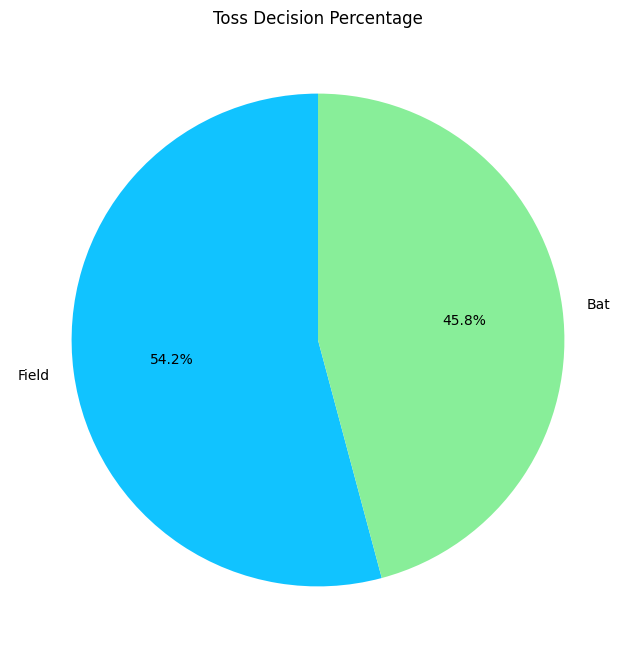

In [5]:
# 1. Pie chart showcasing the percentages of toss decisions whether to bat or to chase
toss_decision_counts = cwc2023_df['Toss Decision'].value_counts()
labels = toss_decision_counts.index
sizes = toss_decision_counts.values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#11c3ff', '#88ee99'])
plt.title('Toss Decision Percentage')
plt.show()

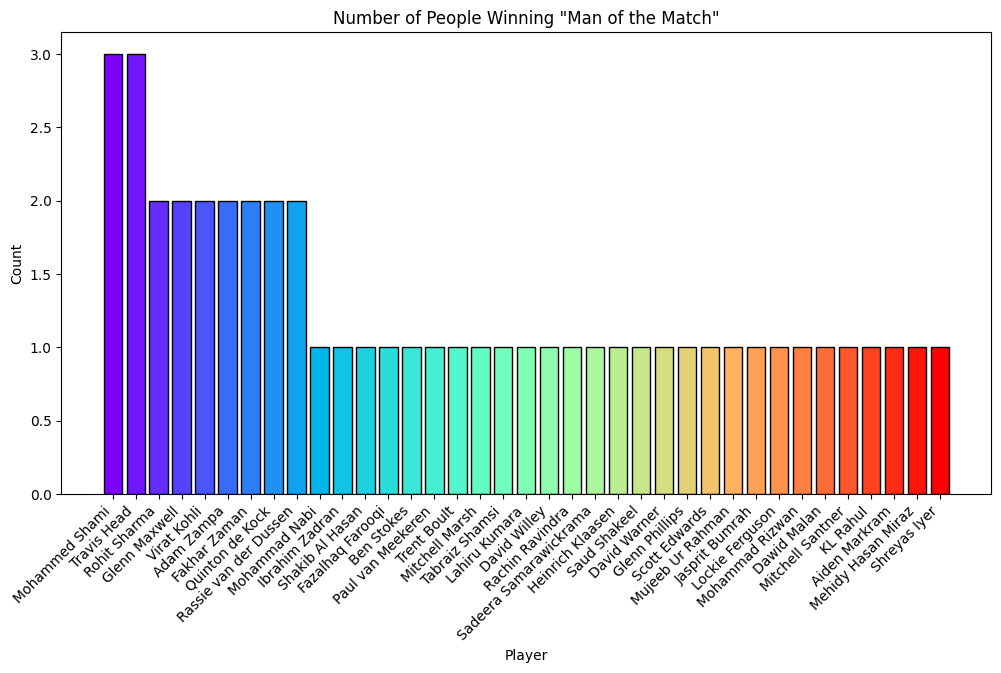

In [6]:
# 2. Extracting 'Man of the Match' counts and displaying in a bar plot
man_of_the_match_counts = cwc2023_df['Man of the Match'].value_counts()

# Create a list of unique colors for each bar
colors = plt.cm.rainbow(np.linspace(0, 1, len(man_of_the_match_counts)))

# Plotting number of people winning "Man of the Match" with different colors for each bar
plt.figure(figsize=(12, 6))
bars = plt.bar(man_of_the_match_counts.index, man_of_the_match_counts, color=colors, edgecolor='black')

# Adding labels and title
plt.title('Number of People Winning "Man of the Match"')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
#plt.legend(legend_labels, man_of_the_match_counts.index, title='Player', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

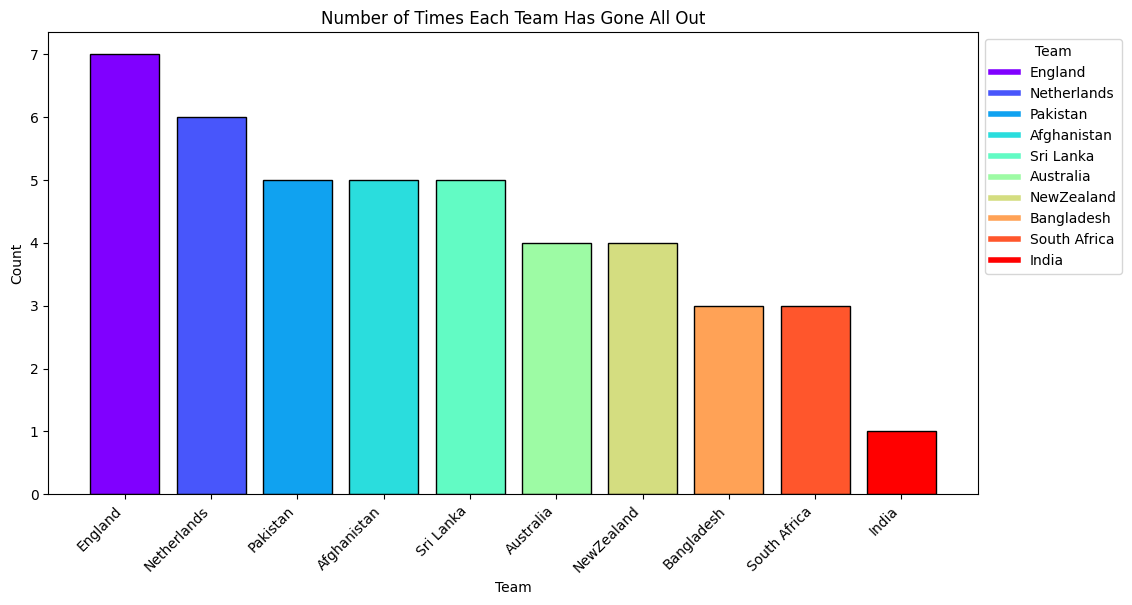

In [7]:
# 3. Total count of all - outs teamwise in a barplot
# Extract counts of times each team has gone all out
all_out_counts = pd.concat([cwc2023_df['Team A'][cwc2023_df['Wickets A'] == 10], cwc2023_df['Team B'][cwc2023_df['Wickets B'] == 10]]).value_counts()

# Create a list of unique colors (shades of RGB) for each bar
colors = plt.cm.rainbow(np.linspace(0, 1, len(all_out_counts)))

# Plotting number of times each team has gone all out with different colors for each bar
plt.figure(figsize=(12, 6))
bars = plt.bar(all_out_counts.index, all_out_counts, color=colors, edgecolor='black')

# Adding labels and title
plt.title('Number of Times Each Team Has Gone All Out')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_labels, all_out_counts.index, title='Team', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

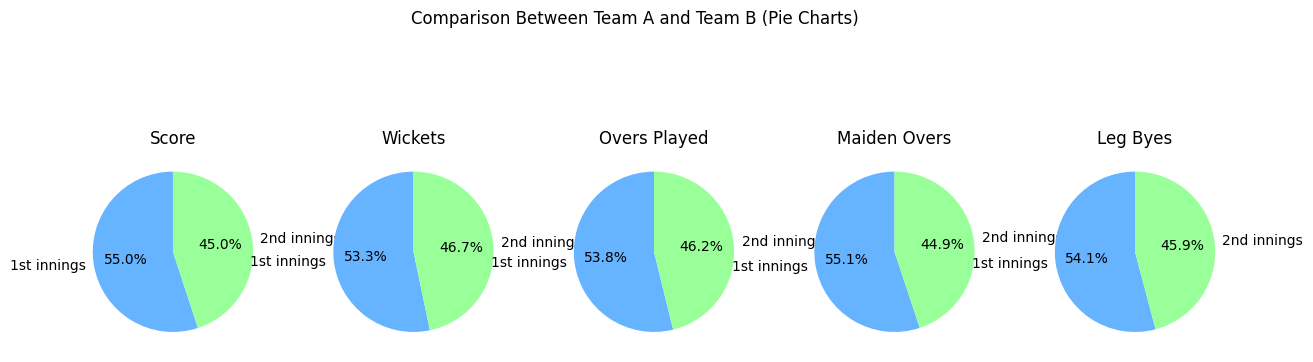

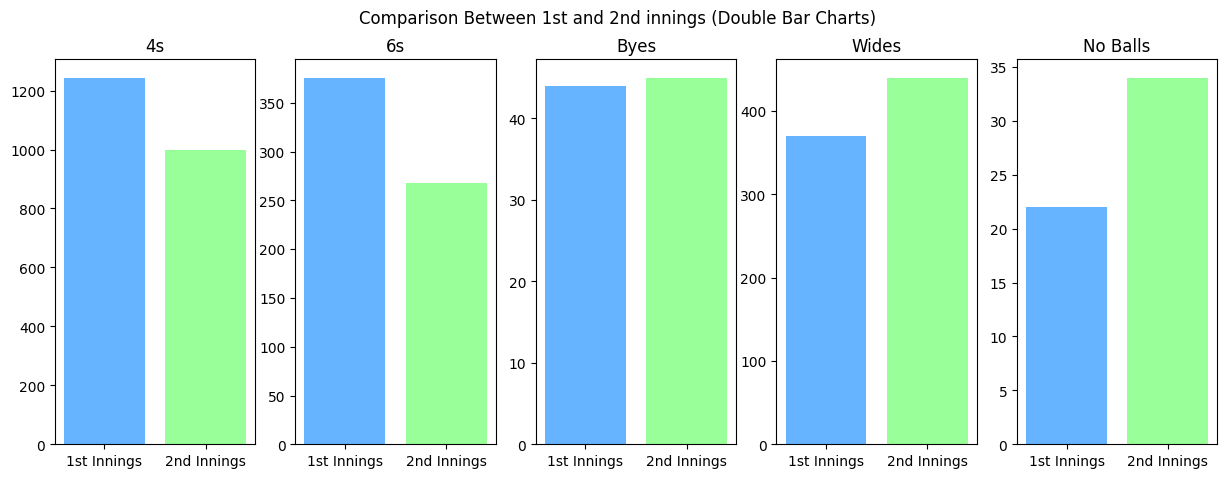

In [8]:
# 4. Innings - wise attribute comparison using pie chart and bar plot
# Attributes for pie charts
pie_attributes = ['Score', 'Wickets', 'Overs Played', 'Maiden Overs', 'Leg Byes']

# Attributes for double bar charts
bar_attributes = ['4s', '6s', 'Byes', 'Wides', 'No Balls']

# Create subplots for pie charts
fig_pie, axes_pie = plt.subplots(1, len(pie_attributes), figsize=(15, 5))
fig_pie.suptitle('Comparison Between Team A and Team B (Pie Charts)')

for i, attribute in enumerate(pie_attributes):
    axes_pie[i].pie([cwc2023_df[f'{attribute} A'].sum(), cwc2023_df[f'{attribute} B'].sum()], labels=['1st innings', '2nd innings'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
    axes_pie[i].set_title(f'{attribute}')

# Create double bar chart
fig_bar, axes_bar = plt.subplots(1, len(bar_attributes), figsize=(15, 5))
fig_bar.suptitle('Comparison Between 1st and 2nd innings (Double Bar Charts)')

for i, attribute in enumerate(bar_attributes):
    axes_bar[i].bar(['1st Innings', '2nd Innings'], [cwc2023_df[f'{attribute} A'].sum(), cwc2023_df[f'{attribute} B'].sum()], color=['#66b3ff', '#99ff99'])
    axes_bar[i].set_title(f'{attribute}')

plt.show()

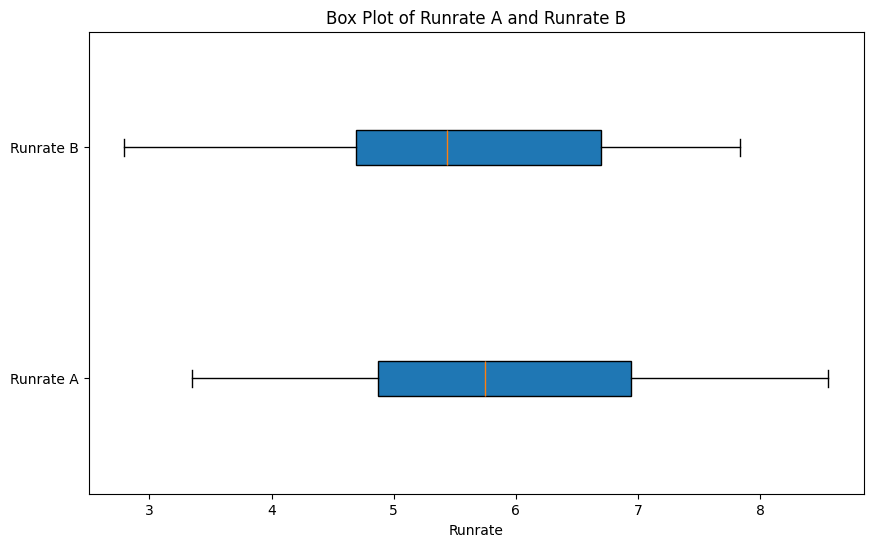

In [9]:
# 5. Plotting box plot for 'Runrate A' and 'Runrate B' in a single graph
plt.figure(figsize=(10, 6))
plt.boxplot([cwc2023_df['Runrate A'].dropna(), cwc2023_df['Runrate B'].dropna()], vert=False, patch_artist=True, labels=['Runrate A', 'Runrate B'])
# plt.boxplot([cwc2023_df['Runrate A'], cwc2023_df['Runrate B']], vert=False, patch_artist=True, labels=['Runrate A', 'Runrate B'])
plt.title('Box Plot of Runrate A and Runrate B')
plt.xlabel('Runrate')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9316\3632857178.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  india_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


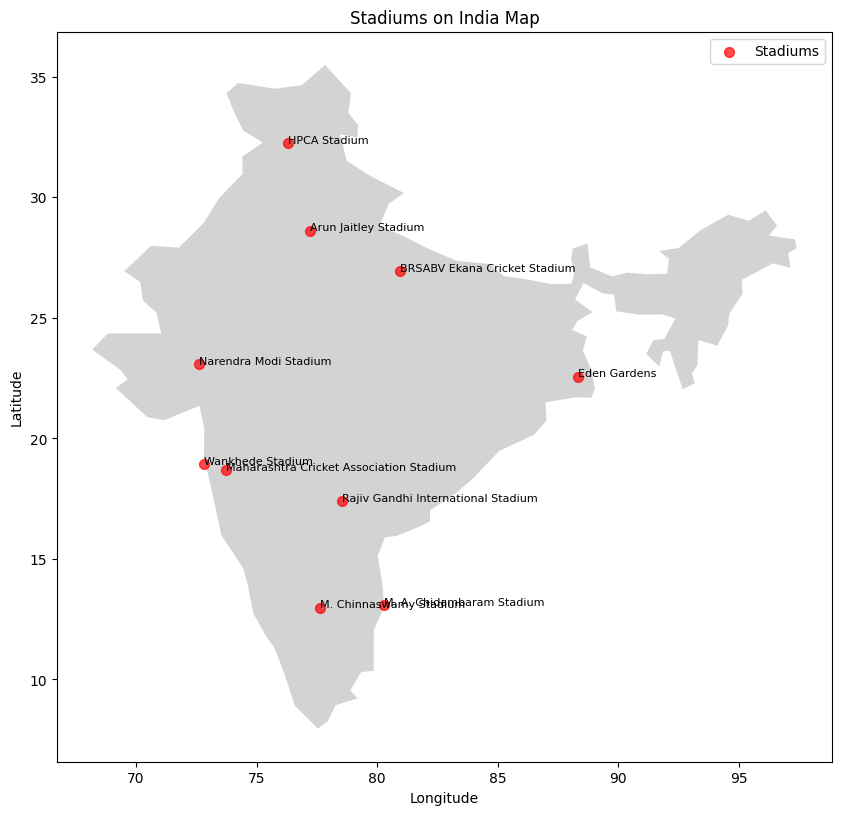

In [10]:
# 6. Venues hosting CWC 2023 matches in India map
india_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india_shapefile = india_shapefile[india_shapefile['name'] == 'India']
# Sample stadium data
stadiums = {
    'Stadium': ['Eden Gardens', 'Narendra Modi Stadium', 'HPCA Stadium', 'Arun Jaitley Stadium',
                'M. A. Chidambaram Stadium', 'BRSABV Ekana Cricket Stadium', 'Maharashtra Cricket Association Stadium',
                'M. Chinnaswamy Stadium', 'Wankhede Stadium', 'Rajiv Gandhi International Stadium'],
    'Latitude': [22.5644, 23.0753, 32.2426, 28.6227, 13.0827, 26.9376, 18.6875, 12.9774, 18.9388, 17.4062],
    'Longitude': [88.3433, 72.6258, 76.3215, 77.2295, 80.2707, 80.9567, 73.7093, 77.6357, 72.8258, 78.5505]
}

stadium_df = pd.DataFrame(stadiums)

# Create a GeoDataFrame from the stadium data
stadium_gdf = gpd.GeoDataFrame(stadium_df, geometry=gpd.points_from_xy(stadium_df['Longitude'], stadium_df['Latitude']))

# Plot the India map
ax = india_shapefile.plot(figsize=(10, 10), color='lightgrey')

# Plot the stadiums on the map
stadium_gdf.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.7, label='Stadiums')

# Add labels for each stadium
for i, stadium in stadium_gdf.iterrows():
    ax.text(stadium['Longitude'], stadium['Latitude'], stadium['Stadium'], fontsize=8)

# Add legend
ax.legend()

plt.title('Stadiums on India Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### _______________________________________________________________________________________________________________________________________________________

#### Dataset 2 :

#### Batting_Stats.csv
##### Data preprocessing
1. Checking for NAN value and we dont have any
##### Operations performed :
1. Batting stats of Indian batsmen
2. Total Runs scored by players from different countries using a bar graph
3. A scatter plot to show strike rate of players from different countries
4. Histogram of all strikerates
5. Bar plot to show the mean of batting average countrywise
6. Countrywise bargraph showing the number of batsmen who has atleast 4 , fifty plus scores
7. Statistics of top 5 leading run scorers.

In [11]:
batting_stats_df=pd.read_csv('Batting_Stats.csv')
batting_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Player        100 non-null    object 
 1   Country       100 non-null    object 
 2   Match_Played  100 non-null    int64  
 3   Inning        100 non-null    int64  
 4   Not_out       100 non-null    int64  
 5   Runs          100 non-null    int64  
 6   High_Score    100 non-null    object 
 7   Average       100 non-null    object 
 8   Ball_Faced    100 non-null    int64  
 9   SR            100 non-null    float64
 10  100           100 non-null    int64  
 11  50            100 non-null    int64  
 12  0             100 non-null    int64  
 13  4s            100 non-null    int64  
 14  6s            100 non-null    int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 11.8+ KB


In [12]:
batting_stats_df.describe()

,Match_Played,Inning,Not_out,Runs,Ball_Faced,SR,100,50,0,4s,6s
count,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,8.020000,7.070000,1.06000,215.12000,227.740000,94.580700,0.400000,1.12000,0.380000,20.200000,6.370000
std,2.291751,2.598582,1.13547,162.66774,164.557357,19.438715,0.791368,1.23321,0.564613,16.374407,6.481762
min,1.000000,1.000000,0.00000,7.00000,8.000000,47.190000,0.000000,0.00000,0.000000,0.000000,1.000000
25%,7.000000,5.000000,0.00000,82.50000,86.500000,80.165000,0.000000,0.00000,0.000000,7.000000,2.000000
50%,9.000000,8.000000,1.00000,158.00000,185.000000,93.380000,0.000000,1.00000,0.000000,16.000000,4.000000
75%,9.000000,9.000000,2.00000,328.25000,358.500000,107.637500,1.000000,2.00000,1.000000,30.250000,9.000000
max,11.000000,11.000000,4.00000,765.00000,847.000000,150.370000,4.000000,6.00000,2.000000,68.000000,31.000000


In [13]:
batting_stats_df.isna().any().sum()

0

In [14]:
# 1. Batting stats of Indian batsmen
indian_team = batting_stats_df[batting_stats_df['Country']=='IND']
indian_team.head(n=15) 

,Player,Country,Match_Played,Inning,Not_out,Runs,High_Score,Average,Ball_Faced,SR,100,50,0,4s,6s
0,RG Sharma,IND,11,11,0,597,131,54.27,474,125.94,1,3,1,66,31
1,SS Iyer,IND,11,11,3,530,128*,66.25,468,113.24,2,3,1,37,24
16,Shubman Gill,IND,9,9,1,354,92,44.25,331,106.94,0,4,0,41,12
25,KL Rahul,IND,11,10,4,452,102,75.33,498,90.76,1,2,0,38,9
26,V Kohli,IND,11,11,3,765,117,95.62,847,90.31,3,6,1,68,9
58,RA Jadeja,IND,11,5,2,120,39*,40.00,118,101.69,0,0,0,7,3
70,Ishan Kishan,IND,2,2,0,47,47,23.50,48,97.91,0,0,1,5,2
86,HH Pandya,IND,4,1,1,11,11*,-,8,137.50,0,0,0,0,1


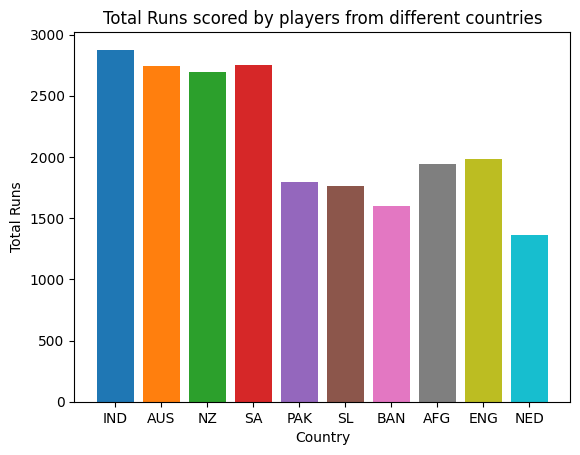

In [15]:
# 2. Total Runs scored by players from different countries using a bar graph
distinct_countries = batting_stats_df['Country'].unique()
#print(distinct_countries)
#  Comparing Runs scored by players from different countries
for country in distinct_countries:
    country_data = batting_stats_df[batting_stats_df['Country'] == country]
    plt.bar(country, country_data['Runs'].sum(), label=country)

plt.xlabel('Country')
plt.ylabel('Total Runs')
plt.title('Total Runs scored by players from different countries')
#plt.legend()
plt.show()

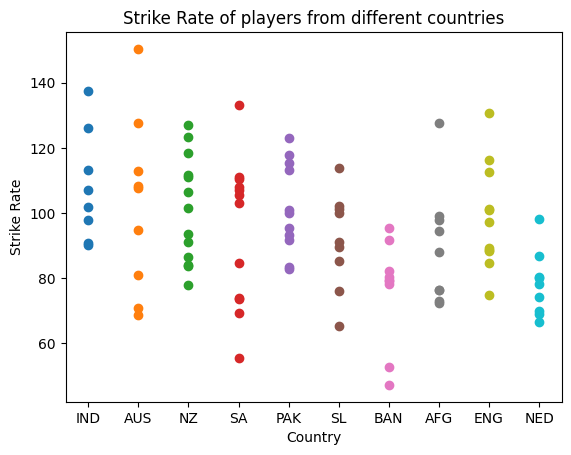

In [16]:
# 3. A scatter plot to show strike rate of players from different countries
for country in distinct_countries:
    country_data = batting_stats_df[batting_stats_df['Country'] == country]
    plt.scatter(country_data['Country'], country_data['SR'], label=country)

plt.xlabel('Country')
plt.ylabel('Strike Rate')
plt.title('Strike Rate of players from different countries')
#plt.legend()
plt.show()

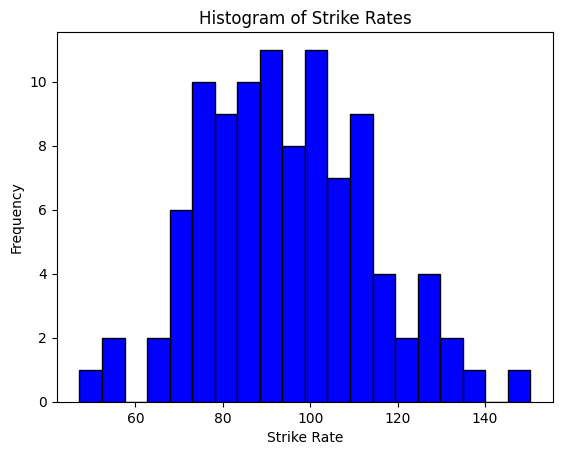

In [17]:
# 4. Histogram of all strikerates
plt.hist(batting_stats_df['SR'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Strike Rates')
plt.show()

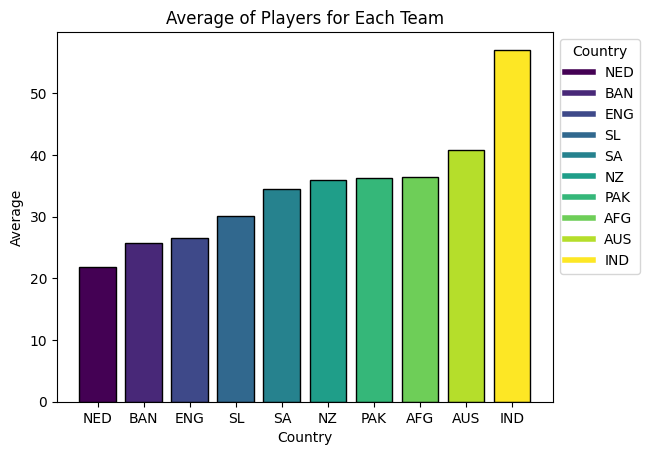

In [18]:
# 5. Bar plot to show the mean of batting average countrywise

batting_stats_df['Average'] = pd.to_numeric(batting_stats_df['Average'].dropna(), errors='coerce')

# Group by 'Country' and calculate the mean of 'Average'
average_by_team = batting_stats_df.groupby('Country')['Average'].mean().sort_values()

# Create a list of unique colors for each bar
colors = plt.cm.viridis(np.linspace(0, 1, len(average_by_team)))

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(average_by_team.index, average_by_team, color=colors, edgecolor='black')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Average')
plt.title('Average of Players for Each Team')

# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(legend_labels, average_by_team.index, title='Country', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

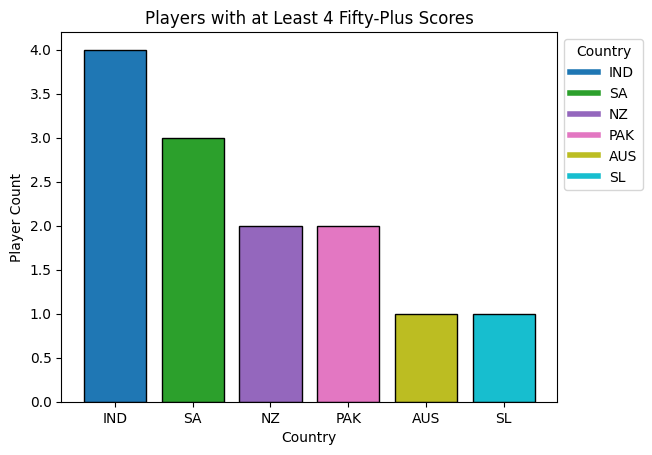

In [19]:
# 6. Countrywise bargraph showing the number of batsmen who has atleast 4 , fifty plus scoress
filtered_df = batting_stats_df[batting_stats_df['50'] + batting_stats_df['100'] >= 4]
#print(filtered_df)
# Count the number of players per country
country_counts = filtered_df['Country'].value_counts()

# Create a list of unique colors for each bar
colors = plt.cm.tab10(np.linspace(0, 1, len(country_counts)))

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(country_counts.index, country_counts, color=colors, edgecolor='black')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Player Count')
plt.title('Players with at Least 4 Fifty-Plus Scores')

# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(legend_labels, country_counts.index, title='Country', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [20]:
# 7. Statistics of top 5 leading run scorers.
top_players = batting_stats_df.nlargest(5, 'Runs')
print(top_players)

          Player Country  Match_Played  Inning  Not_out  Runs High_Score  \
26      V Kohli      IND            11      11        3   765        117   
0     RG Sharma      IND            11      11        0   597        131   
5     Q de Kock       SA            10      10        0   594        174   
10   R Ravindra       NZ            10      10        1   578       123*   
4   DJ Mitchell       NZ            10       9        1   552        134   

    Average  Ball_Faced      SR  100  50  0  4s  6s  
26    95.62         847   90.31    3   6  1  68   9  
0     54.27         474  125.94    1   3  1  66  31  
5     59.40         555  107.02    4   0  0  57  21  
10    64.22         543  106.44    3   2  0  55  17  
4     69.00         497  111.06    2   2  0  48  22  


### _______________________________________________________________________________________________________________________________________________________

#### Dataset 3 :
#### Bowling_Stats.csv
##### Data Preprocessing
1. Need to perform arithmetic operations on column 'maiden' but 'maiden' column is not numeric . Hence converting it to numeric
##### Operations performed : 
1. Bar plot for country wise total number of wickets taken 
2. Finding the player with the maximum number of maiden overs and country with maximum number of wickets
3. Listing the top 5 most economical bowlers
4. Listing the top 5 leading wicket takers

In [21]:
bowling_stats_df = pd.read_csv('Bowling_Stats.csv')
bowling_stats_df.describe()

,Match_Played,Innings,Balls,Overs,Runs,Wkts,Average,Economy,Strike Rate,4'w,5'w
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,6.916667,6.404762,293.154762,48.748810,278.678571,8.214286,42.209524,6.015714,42.704762,0.214286,0.083333
std,3.042701,3.058148,167.370269,27.869699,147.298497,5.929448,22.352719,1.270103,21.787009,0.492631,0.386780
min,1.000000,1.000000,5.000000,0.500000,7.000000,1.000000,7.000000,3.400000,5.000000,0.000000,0.000000
25%,4.000000,4.000000,141.250000,23.525000,155.000000,3.000000,27.882500,5.260000,28.210000,0.000000,0.000000
50%,8.000000,7.000000,300.000000,50.000000,266.000000,6.500000,36.000000,5.840000,36.150000,0.000000,0.000000
75%,9.000000,9.000000,429.000000,71.400000,398.000000,12.000000,50.625000,6.595000,52.125000,0.000000,0.000000
max,11.000000,11.000000,576.000000,96.000000,533.000000,24.000000,118.500000,10.820000,114.000000,3.000000,3.000000


In [22]:
bowling_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bowlers       84 non-null     object 
 1   Country       84 non-null     object 
 2   Match_Played  84 non-null     int64  
 3   Innings       84 non-null     int64  
 4   Balls         84 non-null     int64  
 5   Overs         84 non-null     float64
 6   maiden        84 non-null     object 
 7   Runs          84 non-null     int64  
 8   Wkts          84 non-null     int64  
 9   BBI           84 non-null     object 
 10  Average       84 non-null     float64
 11  Economy       84 non-null     float64
 12  Strike Rate   84 non-null     float64
 13  4'w           84 non-null     int64  
 14  5'w           84 non-null     int64  
dtypes: float64(4), int64(7), object(4)
memory usage: 10.0+ KB


In [23]:
bowling_stats_df.head()

,Bowlers,Country,Match_Played,Innings,Balls,Overs,maiden,Runs,Wkts,BBI,Average,Economy,Strike Rate,4'w,5'w
0,Mohammed Shami,IND,7,7,293,48.5,4,257,24,7/57,10.70,5.26,12.20,1,3
1,A Zampa,AUS,11,11,576,96.0,1,515,23,4/8,22.39,5.36,25.04,3,0
2,D Madushanka,SL,9,9,470,78.2,4,525,21,5/80,25.00,6.70,22.38,1,1
3,JJ Bumrah,IND,11,11,551,91.5,9,373,20,4/39,18.65,4.06,27.55,1,0
4,G Coetzee,SA,8,8,381,63.3,1,396,20,4/44,19.80,6.23,19.05,1,0


In [24]:
bowling_stats_df.isna().any().sum()

0

In [25]:
# Data Preprocessing
# 1. Need to findout player with maximum maiden overs but 'maiden' column is not numeric
# Hence converting it to numeric
bowling_stats_df['maiden'] = pd.to_numeric(bowling_stats_df['maiden'].dropna(), errors='coerce')

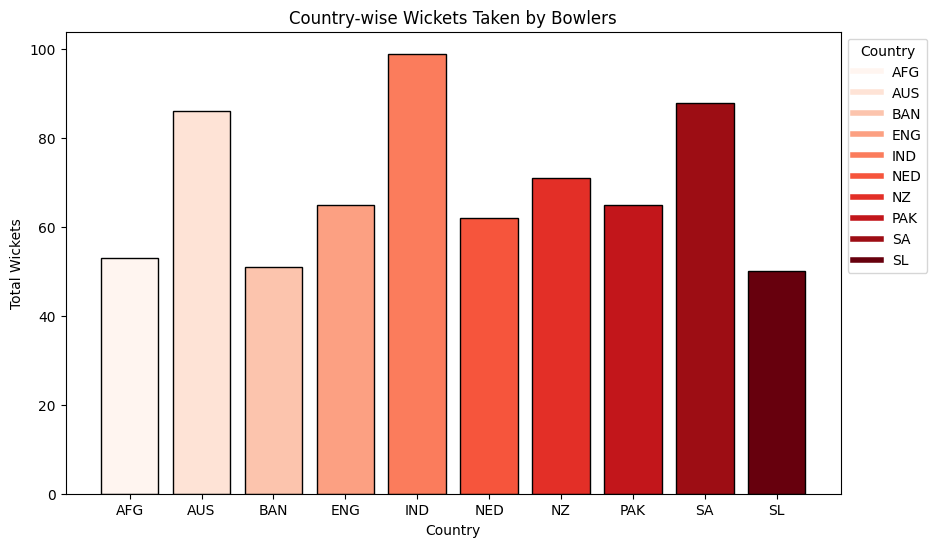

In [26]:
# Operations
# 1. Country wise total number of wickets taken

country_wickets = bowling_stats_df.groupby('Country')['Wkts'].sum().reset_index()
# Create a list of unique colors for each bar
colors = plt.cm.Reds(np.linspace(0, 1, len(country_wickets)))

# Plotting the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(country_wickets['Country'], country_wickets['Wkts'], color=colors, edgecolor='black')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Total Wickets')
plt.title('Country-wise Wickets Taken by Bowlers')

# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_labels, country_wickets['Country'], title='Country', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [27]:
# 2. Find the player with the maximum number of maiden overs
bowling_stats_df['maiden'] = pd.to_numeric(bowling_stats_df['maiden'], errors='coerce')

max_maiden_player = bowling_stats_df.loc[bowling_stats_df['maiden'].idxmax(), 'Bowlers']
max_maiden_overs = bowling_stats_df.loc[bowling_stats_df['maiden'].idxmax(), 'maiden']

print(f'The player with the maximum number of maiden overs is {max_maiden_player} with {max_maiden_overs} maiden overs.')

# Find the country with the maximum number of maiden overs
country_max_maiden = bowling_stats_df.groupby('Country')['maiden'].sum().idxmax()
max_maiden_overs_country = bowling_stats_df.groupby('Country')['maiden'].sum().max()

print(f'The country with the maximum number of maiden overs is {country_max_maiden} with {max_maiden_overs_country} maiden overs.')

The player with the maximum number of maiden overs is JJ Bumrah  with 9.0 maiden overs.
The country with the maximum number of maiden overs is IND with 26.0 maiden overs.


In [28]:
# 3. Top 5 most economical bowlers
top_economical_bowlers = bowling_stats_df.sort_values(by='Economy').head(5)
# Display the top 5 most economical bowlers
print(top_economical_bowlers[['Bowlers', 'Country', 'Economy']])

           Bowlers Country  Economy
79       R Ashwin      IND     3.40
3       JJ Bumrah      IND     4.06
36  Mohammad Nabi      AFG     4.13
13     KA Maharaj       SA     4.15
7       RA Jadeja      IND     4.25


In [29]:
# 4. Top 5 leading wicket takers
top_wicket_takers = bowling_stats_df.sort_values(by='Wkts', ascending=False).head(5)
# Display the top 5 wicket-takers
print(top_wicket_takers[['Bowlers', 'Country', 'Wkts']])

           Bowlers Country  Wkts
0  Mohammed Shami      IND    24
1         A Zampa      AUS    23
2    D Madushanka       SL    21
4       G Coetzee       SA    20
3       JJ Bumrah      IND    20


### _______________________________________________________________________________________________________________________________________________________

#### Dataset 4 :
#### Best_Team.csv
##### Data preprocessing :
1. The inningwise score column , 'Score' is in format 'score/no.of wickets' . Inorder to take only the number of runs score by the team we are removing the slash and number of wickets from the score column
2. 'Innings.1' renamed to proper name 'Innings' as it contains information about both innings
3. No NAN values
##### Operations perfomed :
1. Venue wise average scores in a bar plot
2. Total scores at each venue bar plot
3. Teamwise percentage scores at each venue using pie chart
4. Top 5 high scoring matches
5. Average first innings score at each venue bar plot

In [30]:
best_team_df = pd.read_csv('Best_Team.csv')
best_team_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          96 non-null     object 
 1   Score         96 non-null     object 
 2   Overs         96 non-null     float64
 3   Run Rate      96 non-null     float64
 4   Innings.1     96 non-null     int64  
 5   Opposition.1  96 non-null     object 
 6   Venue         96 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.4+ KB


In [31]:
best_team_df.describe()

,Overs,Run Rate,Innings.1
count,96.000000,96.000000,96.000000
mean,43.973958,5.774687,1.500000
std,7.914281,1.298420,0.502625
min,19.400000,2.790000,1.000000
25%,41.175000,4.800000,1.000000
50%,47.400000,5.690000,1.500000
75%,50.000000,6.750000,2.000000
max,50.000000,8.560000,2.000000


In [32]:
best_team_df.head()

,Team,Score,Overs,Run Rate,Innings.1,Opposition.1,Venue
0,South Africa,428/5,50.0,8.56,1,Sri Lanka,Delhi
1,India,410/4,50.0,8.20,1,Netherlands,Bengaluru
2,New Zealand,401/6,50.0,8.02,1,Pakistan,Bengaluru
3,South Africa,399/7,50.0,7.98,1,England,Wankhede
4,Australia,399/8,50.0,7.98,1,Netherlands,Delhi


In [33]:
best_team_df.isna().any()

Team            False
Score           False
Overs           False
Run Rate        False
Innings.1       False
Opposition.1    False
Venue           False
dtype: bool

In [34]:
# Data Preprocessing
# 1. Convert 'Score' column to string and then extract numeric scores
best_team_df['Score'] = best_team_df['Score'].astype(str).str.extract('(\d+)').astype(float)
# 2. Rename the 'Innings.1' column to 'Innings'
best_team_df = best_team_df.rename(columns={'Innings.1': 'Innings'})

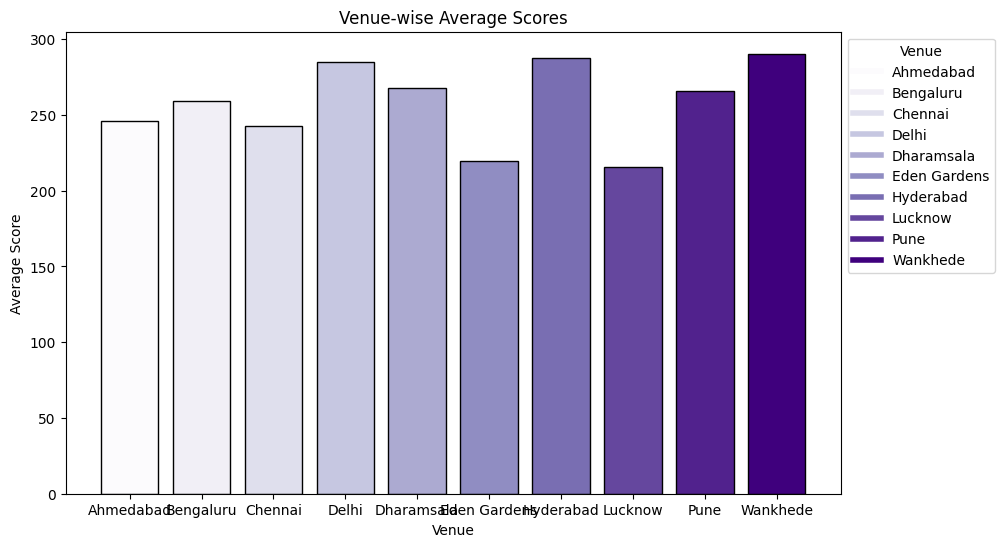

In [35]:
# Operations Perfomed
# 1.Venue wise average scores
# Create a list of unique colors for each bar
colors = plt.cm.Purples(np.linspace(0, 1, len(best_team_df['Venue'].unique())))

# Plotting the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
venue_average_scores = best_team_df.groupby('Venue')['Score'].mean()
bars = plt.bar(venue_average_scores.index, venue_average_scores, color=colors, edgecolor='black')

# Adding labels and title
plt.xlabel('Venue')
plt.ylabel('Average Score')
plt.title('Venue-wise Average Scores')

# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_labels, venue_average_scores.index, title='Venue', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

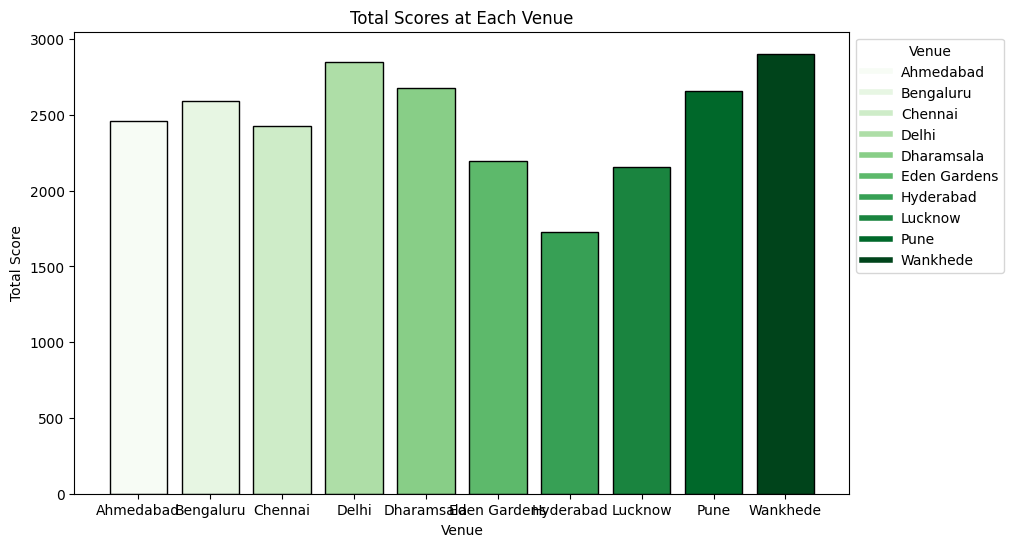

In [36]:
# 2. Total scores at each venue bar plot
# Group by 'Venue' and sum the scores
total_scores_at_venue = best_team_df.groupby('Venue')['Score'].sum().reset_index()
# Create a list of unique colors for each bar
colors = plt.cm.Greens(np.linspace(0, 1, len(total_scores_at_venue['Venue'])))

# Plotting total scores at each venue with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(total_scores_at_venue['Venue'], total_scores_at_venue['Score'], color=colors, edgecolor='black')

# Adding labels and title
plt.xlabel('Venue')
plt.ylabel('Total Score')
plt.title('Total Scores at Each Venue')

# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_labels, total_scores_at_venue['Venue'], title='Venue', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

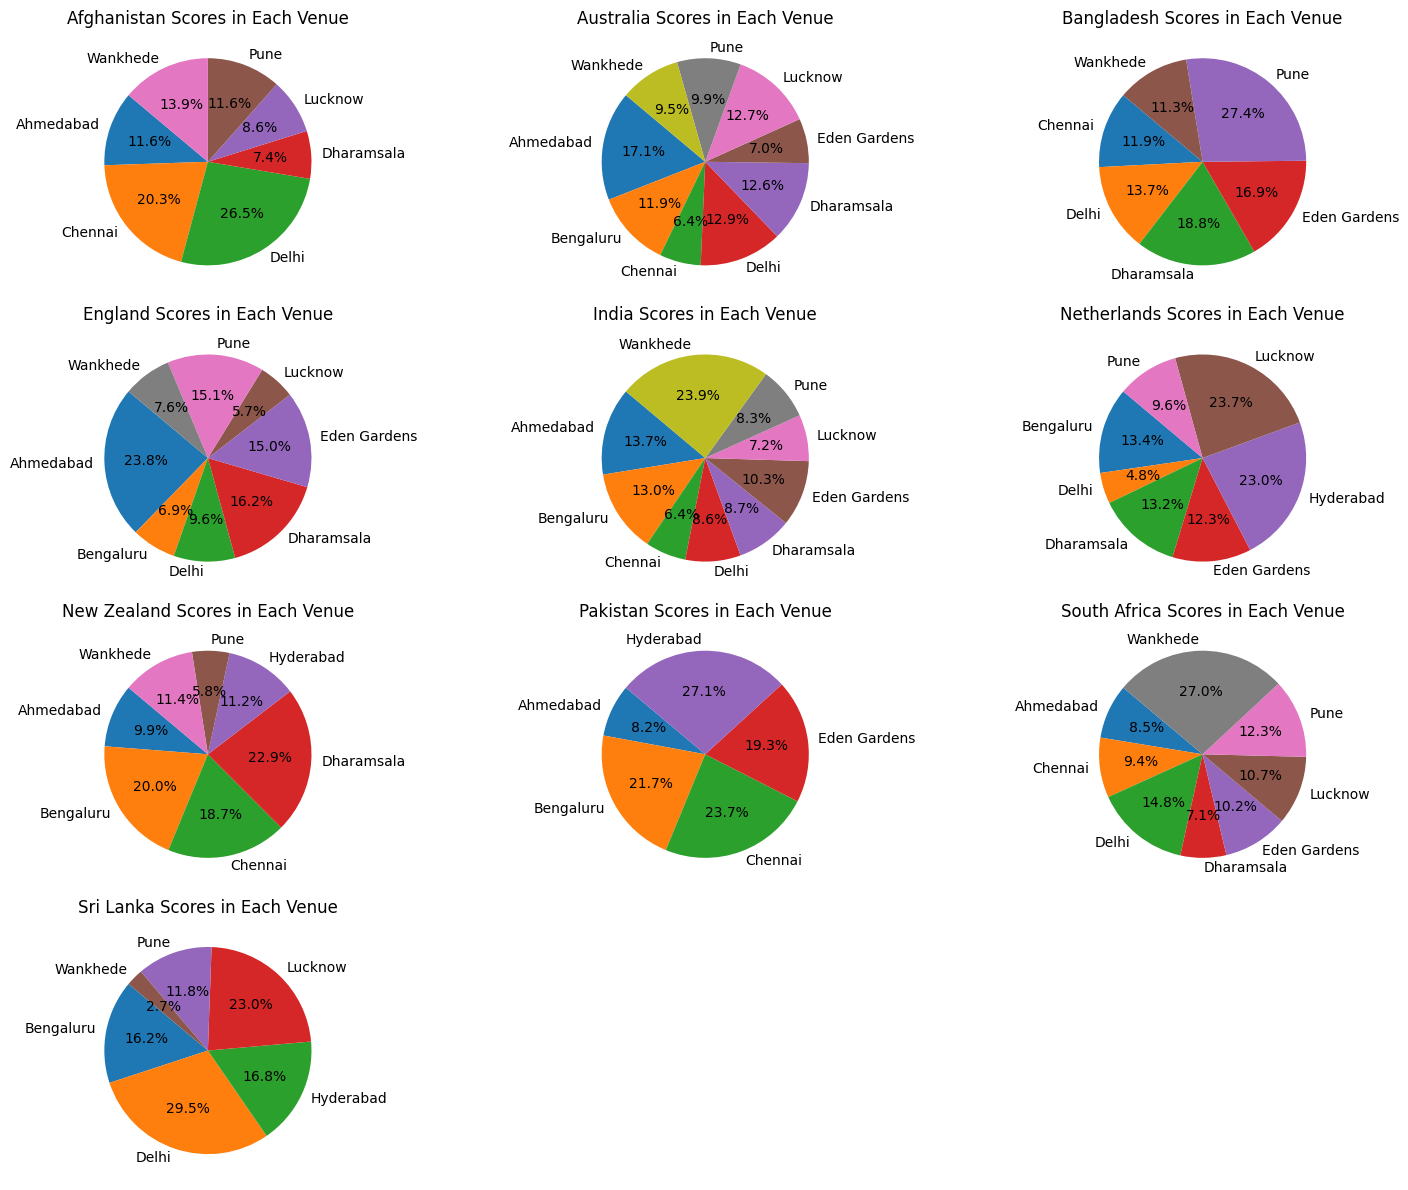

In [37]:
# 3. Teamwise percentage scores at each venue using pie chart
# Group by Team and Venue, summing up the scores
grouped_data = best_team_df.groupby(['Team', 'Venue'])['Score'].sum().reset_index()

# Create pie charts for each team with a maximum of 5 teams per row
teams = grouped_data['Team'].unique()
num_teams = len(teams)
plots_per_row = 3
#num_rows = math.ceil(num_teams / plots_per_row)
num_rows = 4
plt.figure(figsize=(15, 12))

for i, team in enumerate(teams):
    team_data = grouped_data[grouped_data['Team'] == team]
    venues = team_data['Venue']
    scores = team_data['Score']
    
    plt.subplot(num_rows, plots_per_row, i + 1)
    plt.pie(scores, labels=venues, autopct='%1.1f%%', startangle=140)
    plt.title(f'{team} Scores in Each Venue')

plt.tight_layout()
plt.show()

In [38]:
# 4. Top 5 high scoring matches
sorted_dataframe = best_team_df.sort_values(by='Run Rate', ascending=False)
# Select the top 5 countries
top_5_countries = sorted_dataframe.head(5)
# Display the result
print("High scoring matches")
print(top_5_countries)

High scoring matches
           Team  Score  Overs  Run Rate  Innings Opposition.1      Venue
0  South Africa  428.0   50.0      8.56        1    Sri Lanka      Delhi
1         India  410.0   50.0      8.20        1  Netherlands  Bengaluru
2   New Zealand  401.0   50.0      8.02        1     Pakistan  Bengaluru
3  South Africa  399.0   50.0      7.98        1      England   Wankhede
4     Australia  399.0   50.0      7.98        1  Netherlands      Delhi


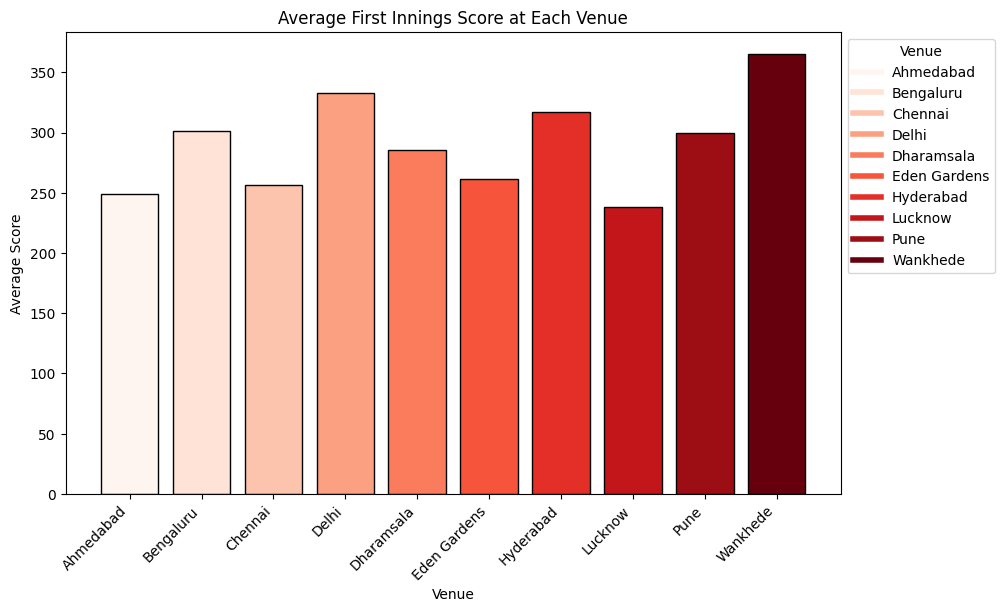

In [39]:
# 5. Average first innings score at each venue bar plot
# Calculate the average first innings score at each venue
average_scores_first_innings = best_team_df[best_team_df['Innings'] == 1].groupby('Venue')['Score'].mean()
# Create a list of unique colors for each bar
colors = plt.cm.Reds(np.linspace(0, 1, len(average_scores_first_innings)))

# Plotting average first innings score at each venue with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(average_scores_first_innings.index, average_scores_first_innings, color=colors, edgecolor='black')

# Adding labels and title
plt.title('Average First Innings Score at Each Venue')
plt.xlabel('Venue')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_labels, average_scores_first_innings.index, title='Venue', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

### _______________________________________________________________________________________________________________________________________________________

#### Dataset 5 :
#### Max_Catches.csv
##### Data preprocessing :
1. No NAN value
2. Giving meaningful name which is 'Player' to column 'Played'
##### Operations perfomed :
1. Team with maximum number of catches


In [40]:
catches_df = pd.read_csv('Max_Catches.csv')
catches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Played          100 non-null    object 
 1   Country         100 non-null    object 
 2   Matches_Played  100 non-null    int64  
 3   Innings         100 non-null    int64  
 4   Catches         100 non-null    int64  
 5   Max             100 non-null    int64  
 6   Ct/Inn          100 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 5.6+ KB


In [41]:
catches_df.describe()

,Matches_Played,Innings,Catches,Max,Ct/Inn
count,100.00000,100.00000,100.000000,100.000000,100.000000
mean,7.46000,7.46000,3.230000,1.560000,0.451630
std,2.75028,2.75028,1.911449,0.640707,0.243692
min,1.00000,1.00000,1.000000,1.000000,0.166000
25%,6.00000,6.00000,2.000000,1.000000,0.296250
50%,8.50000,8.50000,3.000000,1.000000,0.375000
75%,9.00000,9.00000,4.000000,2.000000,0.555000
max,11.00000,11.00000,11.000000,4.000000,1.500000


In [42]:
catches_df.isna().any()

Played            False
Country           False
Matches_Played    False
Innings           False
Catches           False
Max               False
Ct/Inn            False
dtype: bool

In [43]:
catches_df.head()

,Played,Country,Matches_Played,Innings,Catches,Max,Ct/Inn
0,DJ Mitchell,NZ,10,10,11,3,1.100
1,M Labuschagne,AUS,11,11,8,2,0.727
2,DA Warner,AUS,11,11,8,2,0.727
3,DA Miller,SA,10,10,7,2,0.700
4,RA Jadeja,IND,11,11,7,3,0.636


In [44]:
# Data preprocessing
# renaming played column to player
catches_df = catches_df.rename(columns={'Played': 'Player'})

In [45]:
# 1. Team with maximum catches
# Group by 'Country' and sum the 'Catches' column
team_catches = catches_df.groupby('Country')['Catches'].sum()

# Identify the team with the maximum catches
max_catches_team = team_catches.idxmax()
max_catches_value = team_catches.max()

print(f'Team with Maximum Catches: {max_catches_team} (Catches: {max_catches_value})')

Team with Maximum Catches: AUS (Catches: 46)


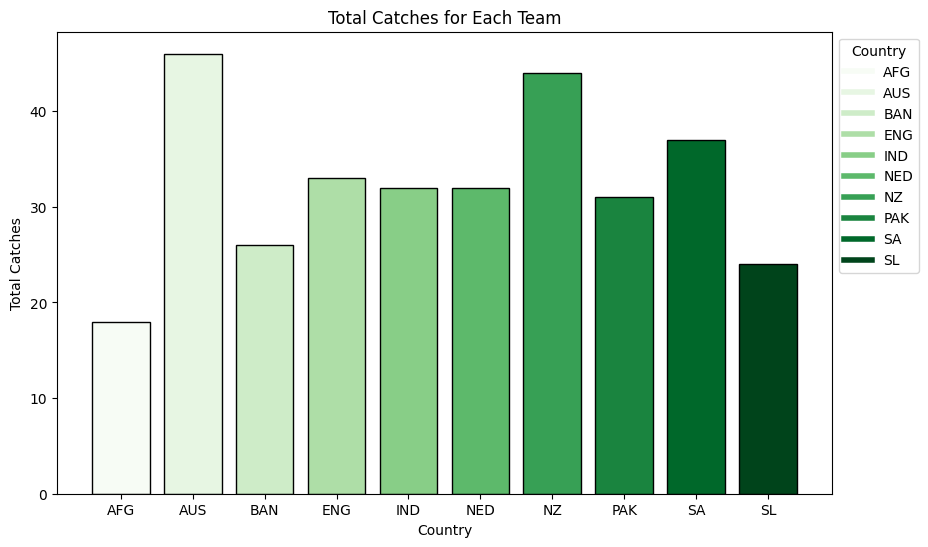

In [46]:
# 2. Team wise number of catches
# Group by 'Country' and sum the 'Catches' column
team_catches = catches_df.groupby('Country')['Catches'].sum().reset_index()
# Create a list of unique colors for each bar
colors = plt.cm.Greens(np.linspace(0, 1, len(team_catches)))

# Plotting the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(team_catches['Country'], team_catches['Catches'], color=colors, edgecolor='black')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Total Catches')
plt.title('Total Catches for Each Team')

# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
plt.legend(legend_labels, team_catches['Country'], title='Country', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

In [47]:
# 3. Player with maximum catches
max_catches_player = catches_df.loc[catches_df['Catches'].idxmax(), 'Player']
max_catches_country = catches_df.loc[catches_df['Catches'].idxmax(), 'Country']

print(f'The player with the maximum catches is {max_catches_player} from {max_catches_country}.')

The player with the maximum catches is DJ Mitchell  from NZ.


### _______________________________________________________________________________________________________________________________________________________

#### Dataset 6 :
#### Partnership.csv

##### Data preprocessing
1. We have versus 'v' in the column 'Opposition' hence we are removing it to just have the name of the team
2. Cleaning 'Runs' column . As there a asterisk '*' followed by any unbroken partnership it might cause isssues to perform arithmetic operations . Hence having only digits by converting it to numeric after removing the asterisk.
##### Operations perfomed :
1. Wicketwise average partnership in a barplot

In [48]:
partnership_df=pd.read_csv('Partnership.csv')
partnership_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Partners    100 non-null    object
 1   Runs        100 non-null    object
 2   Wkt         100 non-null    object
 3   Team        100 non-null    object
 4   Opposition  100 non-null    object
 5   Ground      100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


In [49]:
partnership_df.head()

,Partners,Runs,Wkt,Team,Opposition,Ground
0,"R Ravindra, DP Conway",273*,2nd,New Zealand,v England,Ahmedabad
1,"DA Warner, MR Marsh",259,1st,Australia,v Pakistan,Bengaluru
2,"KL Rahul, SS Iyer",208,4th,India,v Netherlands,Bengaluru
3,"HE van der Dussen, Q de Kock",204,2nd,South Africa,v Sri Lanka,Delhi
4,"GJ Maxwell, PJ Cummins",202*,8th,Australia,v Afghanistan,Wankhede


In [50]:
# Data preprocessing
# 1. We have versus 'v' in the column 'Opposition' hence we are removing it to just have the name of the team
partnership_df['Opposition'] = partnership_df['Opposition'].str.replace('v ', '')

In [51]:
# Data preprocessing
# 2. Cleaning 'Runs' column
# As there a '*' followed by any unbroken partnership it might cause isssues to perform arithmetic operations . 
# Hence having only digits by converting it to numeric after removing the '*'
partnership_df['Runs'] = pd.to_numeric(partnership_df['Runs'].str.replace('[^0-9]', ''), errors='coerce')

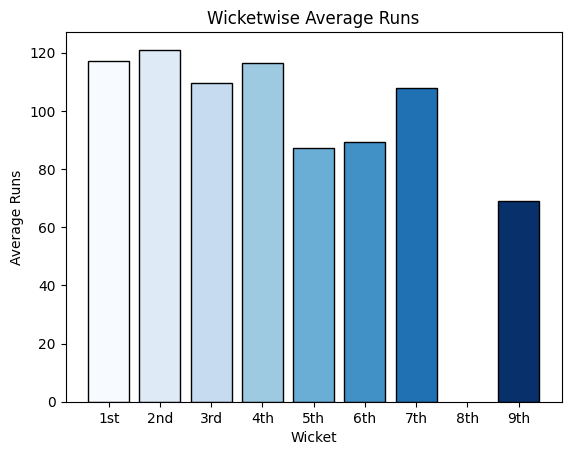

In [52]:
# Operations
# 1. Bar plot for wicketwise average irrespective of country
wicketwise_average = partnership_df.groupby('Wkt')['Runs'].mean()
#print(wicketwise_average)
# Create a list of unique colors for each bar
colors = plt.cm.Blues(np.linspace(0, 1, len(wicketwise_average)))
# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(wicketwise_average.index, wicketwise_average, color=colors, edgecolor='black')
# Adding labels and title
plt.xlabel('Wicket')
plt.ylabel('Average Runs')
plt.title('Wicketwise Average Runs')
# Adding a color legend
legend_labels = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
#ax.legend(legend_labels, wicketwise_average.index, title='Wicket', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### _______________________________________________________________________________________________________________________________________________________ 


#### Dataset 7 :
#### Points_Table.csv

##### Data preprocessing
1. Renamed column NRR with Net Run Rate which will be easy to understand
##### Operation performed
1. Showcasing the points table

In [53]:
Points_Table_df = pd.read_csv('Points_Table.csv')
Points_Table_df.describe()

,Points_gain,Matches_Played,Won,Lost,Nrr
count,10.000000,10.0,10.000000,10.000000,10.000000
mean,9.000000,9.0,4.500000,4.500000,-0.002300
std,4.921608,0.0,2.460804,2.460804,1.352353
min,4.000000,9.0,2.000000,0.000000,-1.825000
25%,4.500000,9.0,2.250000,2.500000,-0.958250
50%,8.000000,9.0,4.000000,5.000000,-0.267500
75%,13.000000,9.0,6.500000,6.750000,0.816500
max,18.000000,9.0,9.000000,7.000000,2.570000


In [54]:
Points_Table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Teams           10 non-null     object 
 1   Points_gain     10 non-null     float64
 2   Matches_Played  10 non-null     float64
 3   Won             10 non-null     float64
 4   Lost            10 non-null     float64
 5   Nrr             10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 660.0+ bytes


In [55]:
# Data Preprocessing
# 1. Renamed column NRR with Net Run Rate which will be easy to understand
Points_Table_df = Points_Table_df.rename(columns={'Nrr': 'Net Run Rate'})

In [56]:
Points_Table_df.head(n=10)

,Teams,Points_gain,Matches_Played,Won,Lost,Net Run Rate
0,IND (Q),18.0,9.0,9.0,0.0,2.570
1,RSA (Q),14.0,9.0,7.0,2.0,1.261
2,AUS (Q),14.0,9.0,7.0,2.0,0.841
3,NZ (Q),10.0,9.0,5.0,4.0,0.743
4,PAK (E),8.0,9.0,4.0,5.0,-0.199
5,AFG (E),8.0,9.0,4.0,5.0,-0.336
6,ENG (E),6.0,9.0,3.0,6.0,-0.572
7,BAN (E),4.0,9.0,2.0,7.0,-1.087
8,SL (E),4.0,9.0,2.0,7.0,-1.419
9,NED (E),4.0,9.0,2.0,7.0,-1.825


### _______________________________________________________________________________________________________________________________________________________ 
